In [70]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 1. Load Data and Overview

In [71]:
# Load the cleaned soil data from CSV files for both iPAGE and iSDA datasets
df_ipage = pd.read_csv('./2410_iPAGE_SoilData_cleaned.csv')
df_isda = pd.read_csv('./iSDA_soil_data(1).csv')
df_grevena = pd.read_csv('./soil_data_grevena.csv')

df_ipage.head()

,Area,Data Collection Year,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,2005,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86
1,Mithpukur,2005,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75
2,Mithpukur,2005,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95
3,Mithpukur,2005,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00
4,Mithpukur,2005,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04


In [72]:
df_isda.head()

,longitude,latitude,start_date,end_date,source,horizon_lower,horizon_upper,aluminium_extractable,boron_extractable,calcium_extractable,...,iron_extractable,magnesium_extractable,manganese_extractable,nitrogen_total,ph,phosphorus_extractable,potassium_extractable,sodium_extractable,sulphur_extractable,zinc_extractable
0,35.18756,-8.62390,01/01/2008,31/12/2018,afsis_spectral https://www.isda-africa.com/pos...,50,20,1109.856,NaN,1535.388,...,92.366,200.601,107.257,2.24,5.942,NaN,283.103,NaN,NaN,NaN
1,35.18558,-8.62300,01/01/2008,31/12/2018,afsis_spectral https://www.isda-africa.com/pos...,50,20,1168.364,NaN,751.408,...,115.923,197.771,90.005,1.57,5.722,NaN,215.459,NaN,NaN,NaN
2,35.18579,-8.62221,01/01/2008,31/12/2018,afsis_spectral https://www.isda-africa.com/pos...,50,20,1137.113,NaN,468.391,...,78.709,188.114,120.433,1.02,5.510,NaN,398.656,NaN,NaN,NaN
3,35.18266,-8.62177,01/01/2008,31/12/2018,afsis_spectral https://www.isda-africa.com/pos...,50,20,1117.349,NaN,739.698,...,127.527,156.417,112.036,1.12,5.817,NaN,267.354,NaN,NaN,NaN
4,35.12984,-8.62005,01/01/2008,31/12/2018,afsis_spectral https://www.isda-africa.com/pos...,50,20,1219.203,NaN,240.071,...,77.542,114.809,57.906,1.19,4.980,NaN,229.682,NaN,NaN,NaN


In [73]:
df_grevena.head()

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,...,Mn ppm,Cu ppm,B ppm,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1.0,42.0,38.0,20.0,5.16,0.274,3.78,0.00,14.46,18.61,...,27.06,1.77,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,54.0,26.0,20.0,6.07,0.355,1.45,0.00,14.59,32.74,...,17.58,1.68,0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,28.0,36.0,36.0,6.92,0.675,1.77,0.40,14.91,19.02,...,18.00,1.84,0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,58.0,20.0,22.0,7.70,0.355,0.72,6.80,4.21,6.28,...,5.04,0.84,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,33.2,41.2,25.6,7.61,0.392,1.00,4.39,6.11,6.55,...,7.16,1.22,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Standardize format of datasets

In [74]:
# Standardizing dataset for comparison of shared features
df_isda_dropped = df_isda.drop(['longitude', 'latitude', 'start_date', 'end_date', 'source', 'horizon_lower', 'horizon_upper', 'aluminium_extractable', 'calcium_extractable', 'carbon_total', 'copper_extractable', 'electrical_conductivity', 'iron_extractable', 'magnesium_extractable', 'manganese_extractable', 'sodium_extractable'], axis=1)
df_isda_named = df_isda_dropped.rename(columns={'ph': 'pH', 'carbon_organic': 'SOC', 'nitrogen_total': 'Nitrogen', 'potassium_extractable': 'Potassium', 'phosphorus_extractable': 'Phosphorus', 'sulphur_extractable': 'Sulfur', 'boron_extractable': 'Boron', 'zinc_extractable': 'Zinc'})
df_isda_sorted = df_isda_named[sorted(df_isda_named.columns)]
df_isda_sorted.head()

,Boron,Nitrogen,Phosphorus,Potassium,SOC,Sulfur,Zinc,pH
0,NaN,2.24,NaN,283.103,30.66,NaN,NaN,5.942
1,NaN,1.57,NaN,215.459,21.15,NaN,NaN,5.722
2,NaN,1.02,NaN,398.656,15.64,NaN,NaN,5.510
3,NaN,1.12,NaN,267.354,15.63,NaN,NaN,5.817
4,NaN,1.19,NaN,229.682,18.49,NaN,NaN,4.980


In [75]:
# Standardizing dataset for comparison of shared features
df_ipage_dropped = df_ipage.drop(['Area', 'Data Collection Year', 'soil group' ,'Land class', 'knit (surface)'], axis=1)
df_ipage_named = df_ipage_dropped.rename(columns={'SOC (%)': 'SOC', 'Nitrogen N (%)': 'Nitrogen', 'Potassium K (meq/100)': 'Potassium', 'Phosphorus P (ug/g)': 'Phosphorus', 'Sulfur S (ug/g)': 'Sulfur', 'Boron B (ug/g)': 'Boron', 'Zinc Zn (ug/g)': 'Zinc'})
df_ipage_sorted = df_ipage_named[sorted(df_ipage_named.columns)]
df_ipage_sorted.head()

,Boron,Nitrogen,Phosphorus,Potassium,SOC,Sulfur,Zinc,pH
0,0.26,0.08,19.6,0.15,1.27,37.7,0.86,5.0
1,0.25,0.09,4.1,0.25,1.47,32.0,0.75,4.9
2,0.27,0.05,13.3,0.09,1.07,13.5,0.95,4.6
3,0.28,0.06,20.2,0.30,1.51,30.0,1.00,5.2
4,0.30,0.11,20.5,0.17,1.08,27.8,1.04,5.3


In [76]:
# Standardizing dataset but keeping Sand, Silt and Clay to asses feature importance
df_grevena_filtered = df_grevena[['Sand %', 'Silt %', 'Clay %', 'pH', 'O.M. %', 'N_NO3 ppm', 'P ppm', 'K ppm ', 'Zn ppm', 'B ppm']]
df_grevena_named = df_grevena_filtered.rename(columns={'Sand %': 'Sand', 'Silt %': 'Silt', 'Clay %': 'Clay', 'O.M. %': 'SOC', 'N_NO3 ppm': 'Nitrogen', 'P ppm': 'Phosphorus', 'K ppm ': 'Potassium', 'Zn ppm': 'Zinc', 'B ppm': 'Boron'})
df_grevena_sorted = df_grevena_named[sorted(df_grevena_named.columns)]
df_grevena_sorted.head()

,Boron,Clay,Nitrogen,Phosphorus,Potassium,SOC,Sand,Silt,Zinc,pH
0,0.40,38.0,14.46,18.61,147.0,3.78,42.0,20.0,0.89,5.16
1,0.41,26.0,14.59,32.74,180.0,1.45,54.0,20.0,3.66,6.07
2,0.46,36.0,14.91,19.02,183.0,1.77,28.0,36.0,3.06,6.92
3,0.50,20.0,4.21,6.28,116.0,0.72,58.0,22.0,1.64,7.70
4,0.40,41.2,6.11,6.55,228.0,1.00,33.2,25.6,0.18,7.61


In [62]:
df_ipage_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Boron       618 non-null    float64
 1   Nitrogen    618 non-null    float64
 2   Phosphorus  618 non-null    float64
 3   Potassium   618 non-null    float64
 4   SOC         618 non-null    float64
 5   Sulfur      618 non-null    float64
 6   Zinc        618 non-null    float64
 7   pH          618 non-null    float64
dtypes: float64(8)
memory usage: 38.8 KB


In [63]:
df_isda_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49225 entries, 0 to 49224
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Boron       2111 non-null   float64
 1   Nitrogen    49179 non-null  float64
 2   Phosphorus  2111 non-null   float64
 3   Potassium   49225 non-null  float64
 4   SOC         49225 non-null  float64
 5   Sulfur      2111 non-null   float64
 6   Zinc        2111 non-null   float64
 7   pH          49222 non-null  float64
dtypes: float64(8)
memory usage: 3.0 MB


In [77]:
df_grevena_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Boron       781 non-null    float64
 1   Clay        781 non-null    float64
 2   Nitrogen    781 non-null    float64
 3   Phosphorus  781 non-null    float64
 4   Potassium   781 non-null    float64
 5   SOC         781 non-null    float64
 6   Sand        781 non-null    float64
 7   Silt        781 non-null    float64
 8   Zinc        781 non-null    float64
 9   pH          781 non-null    float64
dtypes: float64(10)
memory usage: 63.3 KB


## 3.Drop outliers from IPAGE dataset

In [78]:
# Dropping extreme outliers from ipage data in accordance with my previosu EDA notebook
columns = ['Boron', 'Nitrogen', 'Phosphorus', 'Potassium', 'SOC', 'Sulfur', 'Zinc', 'pH']

upper_thresh = 0.97

# Create a copy of the sorted iPAGE data for outlier trimming
df_ipage_trimmed = df_ipage_sorted.copy()

# Loop through each feature and filter out extreme values above the 97th percentile
for col in columns:
    upper_bound = df_ipage_trimmed[col].quantile(upper_thresh)
    df_ipage_trimmed = df_ipage_trimmed[(df_ipage_trimmed[col] < upper_bound)]

## 4.Scale features for comparing distributions and correlations

In [80]:
# Initialize a standard scaler for feature normalization
scaler = StandardScaler()

# Apply scaling to both datasets for consistent feature ranges
df_isda_scaled = scaler.fit_transform(df_isda_sorted)
df_ipage_scaled = scaler.fit_transform(df_ipage_trimmed)
df_grevena_scaled = scaler.fit_transform(df_grevena_sorted)

# Convert scaled data back to DataFrames with column names to facilitate later analysis
df_isda_scaled = pd.DataFrame(df_isda_scaled, columns=columns)
df_ipage_scaled = pd.DataFrame(df_ipage_scaled, columns=columns)
df_grevena_scaled = pd.DataFrame(df_grevena_scaled, columns=df_grevena_sorted.columns)

KeyError: 'Sulfur'

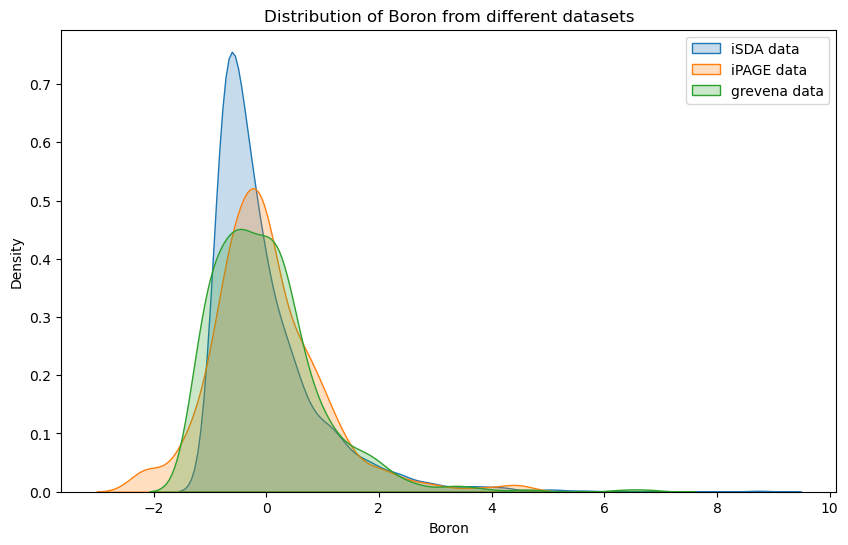

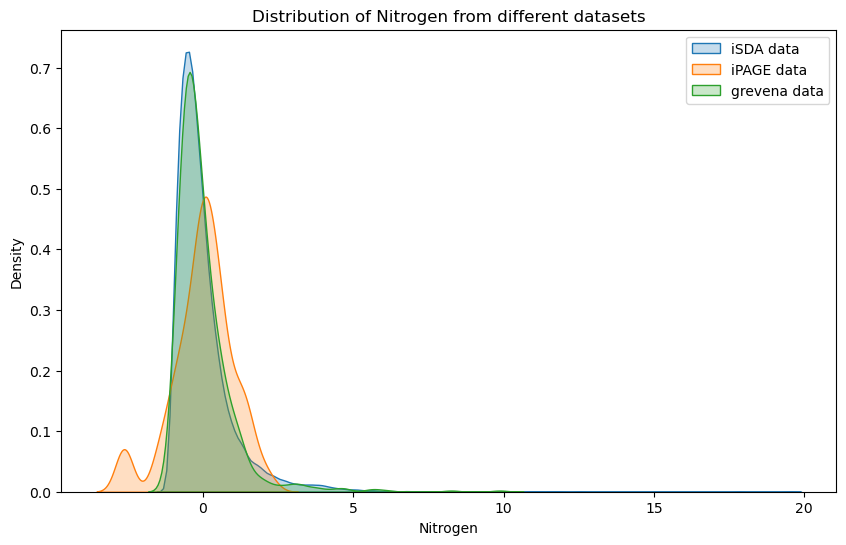

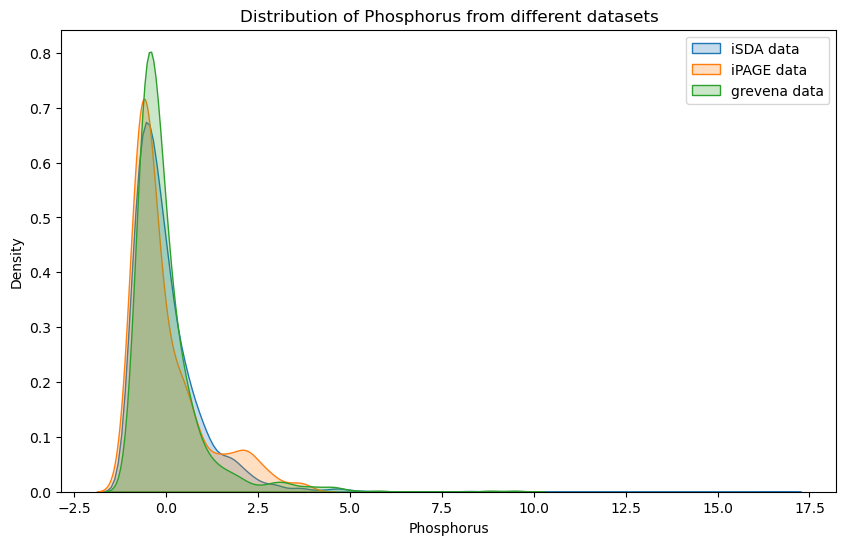

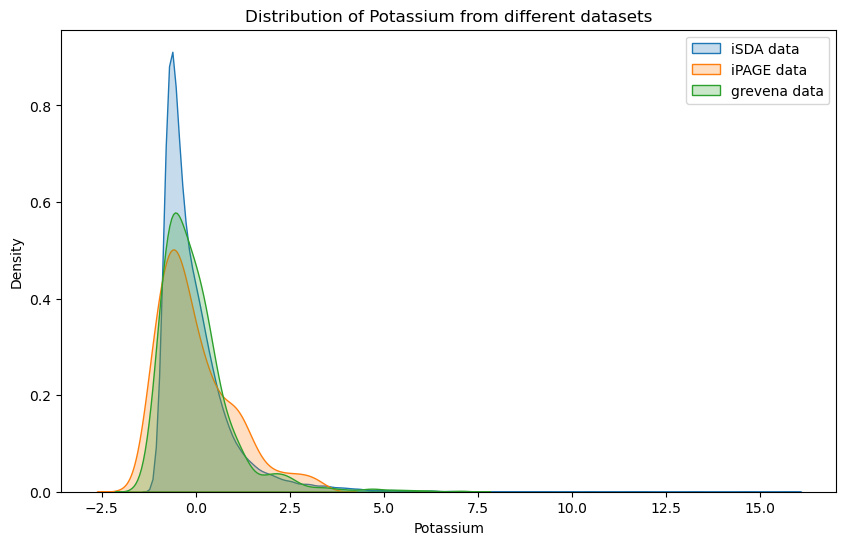

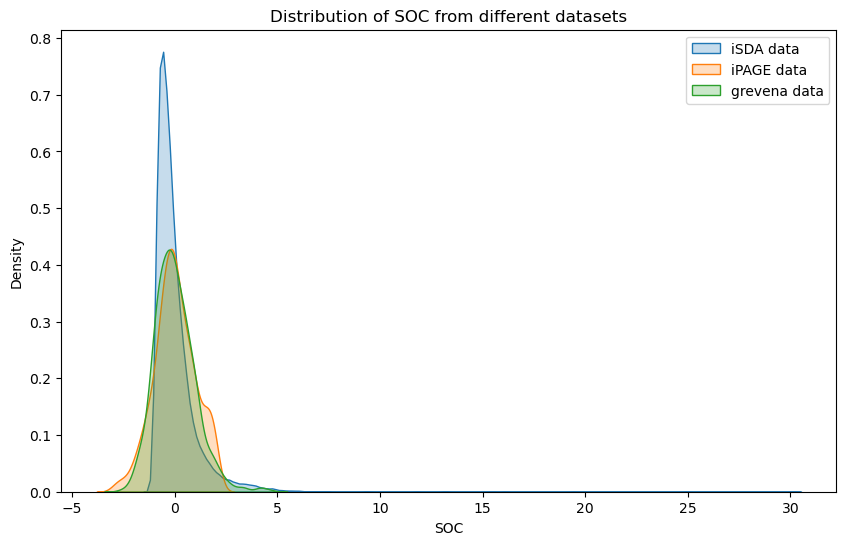

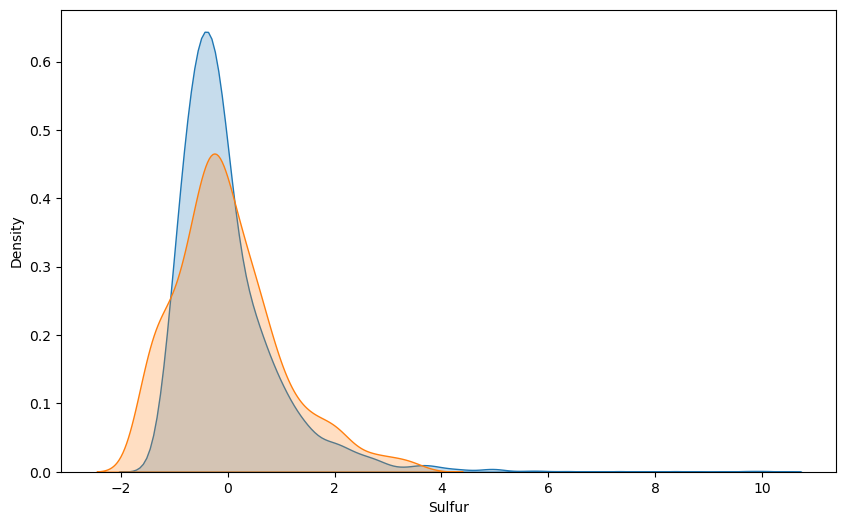

In [82]:
# Plot kernel density estimates for each feature, comparing the distributions of iSDA and iPAGE datasets
for feature in columns:
    plt.figure(figsize=(10, 6))

    # KDE plot for the iSDA dataset feature distribution
    sns.kdeplot(df_isda_scaled[feature], label='iSDA data', fill=True)

    # KDE plot for the iPAGE dataset feature distribution
    sns.kdeplot(df_ipage_scaled[feature], label='iPAGE data', fill=True)

    # KDE plot for the grevena dataset feature distribution
    sns.kdeplot(df_grevena_scaled[feature], label='grevena data', fill=True)
    
    # Set plot title and labels for each feature comparison
    plt.title(f'Distribution of {feature} from different datasets')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()


Text(0.5, 1.0, 'grevena Data Correlation')

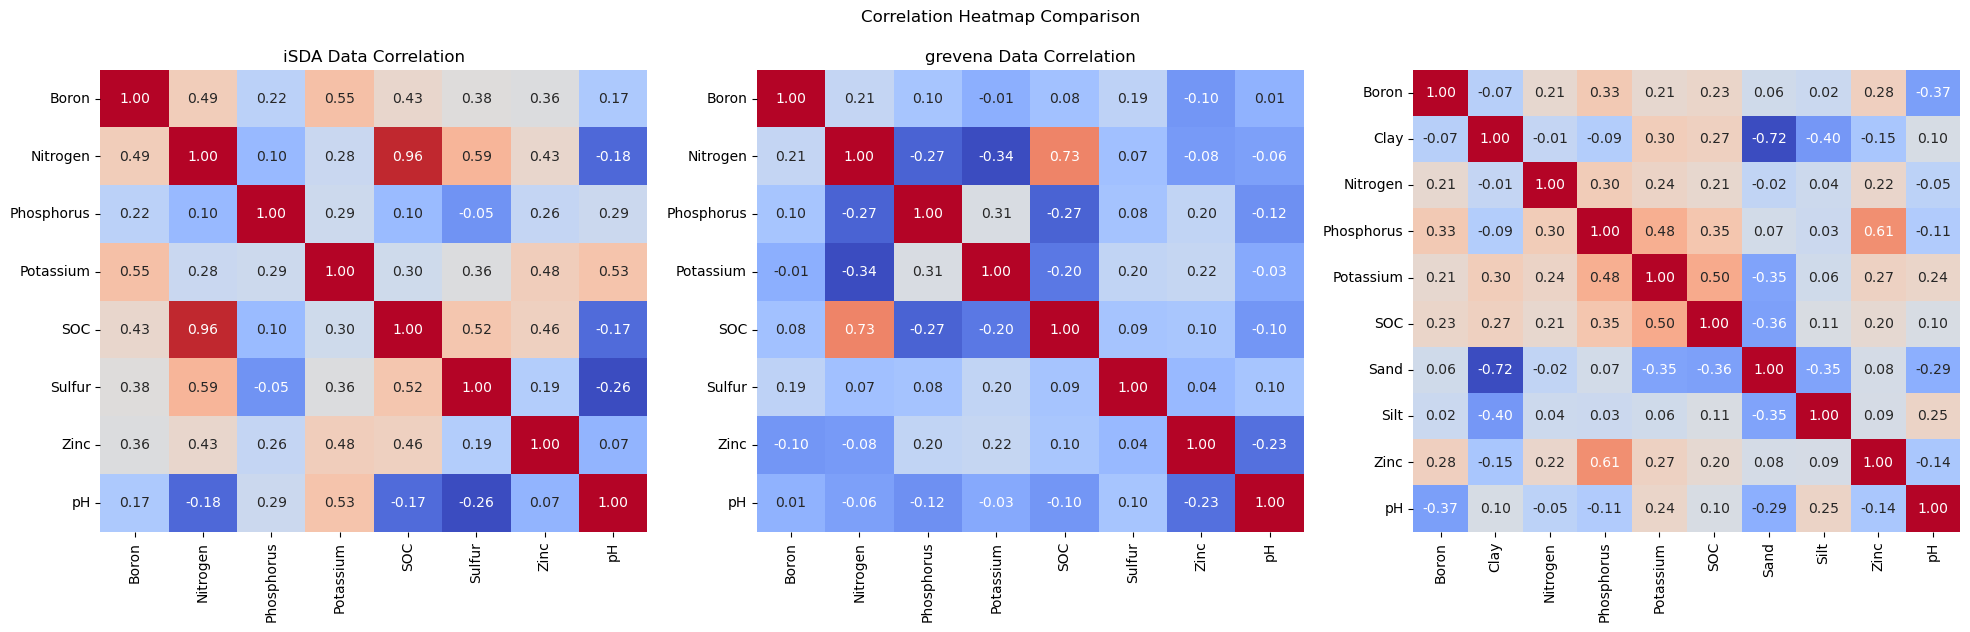

In [92]:
# Compute correlation matrices for both scaled iSDA and iPAGE datasets
corr_isda = df_isda_scaled.corr()
corr_ipage = df_ipage_scaled.corr()
corr_grevena = df_grevena_scaled.corr()

# Initialize subplots to compare correlation heatmaps for the datasets
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle("Correlation Heatmap Comparison")

# Heatmap for iSDA dataset correlations
sns.heatmap(corr_isda, ax=axes[0], cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
axes[0].set_title("iSDA Data Correlation")

# Heatmap for iPAGE dataset correlations
sns.heatmap(corr_ipage, ax=axes[1], cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
axes[1].set_title("iPAGE Data Correlation")

# Heatmap for grevena dataset correlations
sns.heatmap(corr_grevena, ax=axes[2], cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
axes[1].set_title("grevena Data Correlation")


## Conclusion: ##

**While the correlation between SOC and Nitrogen seems fairly consistent between the two tropical datasets, most of the other features have different correlation structures so combined the datasets might not have the desired outcome of making the model more robust. It could be a good use of time to do a meta analysis of the additional data sets we have to see which ones are likely to be useful, or whether perhaps there is just a lot of noise with the different regions and with different data collection methods**

In [93]:
# Exporting to csv so that I can play around with some machine learning on these data sets

df_isda_scaled.to_csv('isda_scaled.csv', index=False)
df_ipage_scaled.to_csv('ipage_scaled.csv', index=False)
df_grevena_scaled.to_csv('grevena_scaled.csv', index=False)